# Cardiovascular Mortality and Aging Population

Using datasets from the World Health Organization, or WHO, I will explore how cardiovascular disease deaths vary across countries and years, and examine one central demographic factor, the share of the population aged 60 and above.

The reason why I want to explore this topic is because cardiovascular disearses are one of the leading causes of death worldwide. What is more, population is widely considered as a key structural driver behind increasing mortality risk.

By conbining the cause-specific mortality data with detailed age-group population data, this projects inverstigates whether aging populations experience higher CVD mortality buredens.

Hypothesis: Countries with a larger proportion of older adults (aged 60+) will have higher cardiovascular mortality rates. Even within a short time window, we expect cross-country differences in age structure to align with differences in cardiovascular disease burden.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


For the sake of this exploration, I will begin with the WHO Mortality Database (ICD-10).

In [55]:
# import first dataset: WHO mortality data (ICD-10 causes)
morticd = pd.read_csv("data/Morticd10.csv", dtype=str)
morticd

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2021,101,1000,1,07,01,481,...,155,NaN,NaN,NaN,NaN,0,0,5,1,2
1,1400,NaN,NaN,2021,101,1000,2,07,01,444,...,219,NaN,NaN,NaN,NaN,0,1,3,4,3
2,1400,NaN,NaN,2021,101,1001,1,07,01,14,...,1,NaN,NaN,NaN,NaN,0,0,0,0,1
3,1400,NaN,NaN,2021,101,1001,2,07,01,8,...,1,NaN,NaN,NaN,NaN,0,0,1,0,0
4,1400,NaN,NaN,2021,101,1002,1,07,01,0,...,0,NaN,NaN,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369235,5020,NaN,NaN,2023,104,Y86,2,00,01,38,...,4,7,8,5,3,0,0,0,0,0
369236,5020,NaN,NaN,2023,104,Y881,1,00,01,2,...,1,1,0,0,0,0,0,0,0,0
369237,5020,NaN,NaN,2023,104,Y883,1,00,01,5,...,0,2,0,0,1,0,0,0,0,0
369238,5020,NaN,NaN,2023,104,Y883,2,00,01,1,...,0,0,0,1,0,0,0,0,0,0


This dataset reports annual death counts by country, year, sex, and cause of death.

In [58]:
# convert key columns to numeric
morticd["Cause"] = morticd["Cause"].astype(str)
cvd = morticd[morticd["Cause"].str.startswith("I", na=False)]
cvd.shape

(43655, 39)

To focus the analysis, I limit the dataset to cardiovascular diseases (ICD-10 cause codes 1000–1999). These causes include heart disease, stroke, and other major cardiovascular conditions. Summing the deaths across sexes gives the total number of cardiovascular deaths for each country and year.

In [60]:
# ICD-10 cardiovascular diseases are 1000–1999
cvd["Year"] = pd.to_numeric(cvd["Year"], errors="coerce")
cvd["Deaths1"] = pd.to_numeric(cvd["Deaths1"], errors="coerce")
cvd["Country"] = pd.to_numeric(cvd["Country"], errors="coerce")


/var/folders/wq/202j15cn72x_7mv_cy98qm300000gn/T/ipykernel_59348/903554875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd["Year"] = pd.to_numeric(cvd["Year"], errors="coerce")
/var/folders/wq/202j15cn72x_7mv_cy98qm300000gn/T/ipykernel_59348/903554875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd["Deaths1"] = pd.to_numeric(cvd["Deaths1"], errors="coerce")
/var/folders/wq/202j15cn72x_7mv_cy98qm300000gn/T/ipykernel_59348/903554875.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [61]:
cvd_country_year = (
    cvd.groupby(["Country", "Year"], as_index=False)["Deaths1"]
       .sum()
       .rename(columns={"Deaths1": "CVD_deaths"})
)

cvd_country_year.head()


,Country,Year,CVD_deaths
0,1030,2021,1278
1,1300,2021,4225
2,1300,2022,4525
3,1300,2023,3636
4,1303,2021,198


The second dataset is the WHO Population and Live Births data.

In [ ]:
# import second dataset: WHO Population and Live Births data
pop = pd.read_csv("data/pop.csv", dtype=str)
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1030,NaN,NaN,2021,1,04,1175948,26106,87398,NaN,...,27217,21181,13953,17519,NaN,NaN,NaN,NaN,0,25765
1,1030,NaN,NaN,2021,2,04,1217451,25831,86477,NaN,...,34925,27390,17744,25801,NaN,NaN,NaN,NaN,0,25197
2,1060,NaN,NaN,1980,1,07,137100,3400,15800,NaN,...,NaN,5300,NaN,2900,NaN,NaN,NaN,NaN,6500,5000
3,1060,NaN,NaN,1980,2,07,159000,4000,18400,NaN,...,NaN,6200,NaN,3400,NaN,NaN,NaN,NaN,7500,6000
4,1125,NaN,NaN,1955,1,02,5051500,150300,543400,NaN,...,110200,51100,41600,14300,11800,25300,NaN,NaN,0,253329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10205,5198,NaN,NaN,2017,2,03,319192.6264,8018.862999,7989.670031,7977.625751,...,6239.247979,5062.873097,3601.905772,4347.471504,NaN,NaN,NaN,NaN,0,NaN
10206,5198,NaN,NaN,2018,1,03,340520.5176,8630.00982,8552.239421,8515.408794,...,6587.270532,5109.808634,3482.798415,4450.304553,NaN,NaN,NaN,NaN,0,NaN
10207,5198,NaN,NaN,2018,2,03,326036.483,8015.096596,7986.494468,7975.603354,...,6422.052069,5257.338854,3744.042066,4552.898314,NaN,NaN,NaN,NaN,0,NaN
10208,5200,NaN,NaN,2003,1,04,51711,1156,5045,NaN,...,1390,1193,859,952,NaN,NaN,NaN,NaN,0,1433


This dataset contains the total population broken down into 26 age groups for each country and year.

In [72]:
pop["Country"] = pd.to_numeric(pop["Country"], errors="coerce")
pop["Year"] = pd.to_numeric(pop["Year"], errors="coerce")

pop_cols = [c for c in pop.columns if c.startswith("Pop")]
elderly_cols = ["Pop13", "Pop14", "Pop15", "Pop16", "Pop17", "Pop18", "Pop19", "Pop20", "Pop21"]


In [73]:
for c in pop_cols:
    pop[c] = pd.to_numeric(pop[c], errors="coerce")
    
pop["TotalPop"] = pop[pop_cols].sum(axis=1)
pop["Elderly"] = pop[elderly_cols].sum(axis=1)
pop["ElderlyRatio"] = pop["Elderly"] / pop["TotalPop"]

pop_simple = pop[["Country", "Year", "TotalPop", "Elderly", "ElderlyRatio"]]
pop_simple.head()

,Country,Year,TotalPop,Elderly,ElderlyRatio
0,1030,2021,2351896.0,409647.0,0.174177
1,1030,2021,2434902.0,451969.0,0.185621
2,1060,1980,274100.0,36800.0,0.134258
3,1060,1980,318000.0,42800.0,0.134591
4,1125,1955,10103000.0,1450300.0,0.143551


Because this project focuses on population aging, I use age groups Pop20–Pop26, which correspond to adults aged 60 and above. Summing these values gives the older population, and comparing it to the total population provides the elderly population share.

The mortality and population data use numeric country codes. I merge a country‐code lookup table to attach readable country names.

In [74]:
codes = pd.read_csv("data/country_codes.csv", dtype=str)
codes.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [75]:
# merge mortality and population
merged = pd.merge(
    cvd_country_year,
    pop_simple,
    on=["Country", "Year"],
    how="inner"
)

# attach country names
merged["Country"] = merged["Country"].astype(int).astype(str)
codes["country"] = codes["country"].astype(str)

merged = merged.merge(codes, left_on="Country", right_on="country", how="left")
merged.drop(columns=["country"], inplace=True)

# compute CVD mortality rate
merged["CVD_mortality_rate"] = merged["CVD_deaths"] / merged["TotalPop"] * 100000

# keep recent years in your dataset
merged = merged[(merged["Year"] >= 2021) & (merged["Year"] <= 2023)]

merged.head()

,Country,Year,CVD_deaths,TotalPop,Elderly,ElderlyRatio,name,CVD_mortality_rate
0,1030,2021,1278,2351896.0,409647.0,0.174177,Botswana,54.339137
1,1030,2021,1278,2434902.0,451969.0,0.185621,Botswana,52.486712
2,1300,2021,4225,1252006.0,318947.0,0.254749,Mauritius,337.458447
3,1300,2021,4225,1280114.0,334217.0,0.261084,Mauritius,330.048730
4,1300,2022,4525,1247574.0,319495.0,0.256093,Mauritius,362.703936


Using country and year as common identifiers, I merge the cardiovascular mortality data with the population data and then attach country names from the code table.

Before selecting representative countries, I categorize all countries into aging levels based on their average elderly share (2021–2023):

High-aging: ≥ 30% aged 60+

Medium-aging: 15–30%

Low-aging: < 15%

This provides a global view of aging patterns and helps justify selecting one country from each group.

In [76]:
# compute average elderly ratio per country (2021–2023)
aging_summary = (
    merged.groupby("Country")["ElderlyRatio"]
           .mean()
           .reset_index()
           .merge(codes, left_on="Country", right_on="country", how="left")
)

def classify(x):
    if x >= 0.30:
        return "High-aging"
    elif x >= 0.15:
        return "Medium-aging"
    else:
        return "Low-aging"

aging_summary["AgingGroup"] = aging_summary["ElderlyRatio"].apply(classify)

aging_summary.head()


,Country,ElderlyRatio,country,name,AgingGroup
0,1030,0.179899,1030,Botswana,Medium-aging
1,1300,0.259614,1300,Mauritius,Medium-aging
2,3080,0.257565,3080,Cyprus,Medium-aging
3,3090,0.312120,3090,Hong Kong SAR,High-aging
4,3150,0.203881,3150,Israel,Medium-aging


Bar Chart: Number of Countries by Aging Group

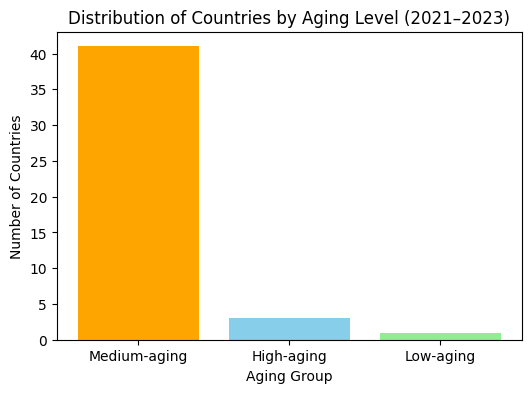

In [77]:
count_by_group = aging_summary["AgingGroup"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(count_by_group.index, count_by_group.values, color=["orange","skyblue","lightgreen"])
plt.xlabel("Aging Group")
plt.ylabel("Number of Countries")
plt.title("Distribution of Countries by Aging Level (2021–2023)")
plt.show()


In [88]:
aging_summary["name"].sort_values().unique()[:50]


array(['Armenia', 'Australia', 'Austria', 'Belgium',
       'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Georgia', 'Hong Kong SAR', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mauritius', 'Mongolia', 'Netherlands',
       'North Macedonia', 'Occupied Palestinian Territory', 'Oman',
       'Poland', 'Qatar', 'Republic of Korea', 'Saudi Arabia', 'Serbia',
       'Singapore', 'Slovakia', 'Spain', 'Sweden', 'Thailand', 'Turkey',
       'United Kingdom, England and Wales',
       'United Kingdom, Northern Ireland'], dtype=object)

In [89]:
selected_names = ["Japan", "France", "Botswana"]

selected_rows = aging_summary[aging_summary["name"].isin(selected_names)]

selected_three = selected_rows.copy()

selected_three[["Country", "name", "ElderlyRatio"]]




,Country,name,ElderlyRatio
0,1030,Botswana,0.179899
5,3160,Japan,0.296368
25,4080,France,0.266599


In [90]:
country_list = selected_three["Country"].astype(str).tolist()
df_plot = merged[ merged["Country"].isin(country_list) ]


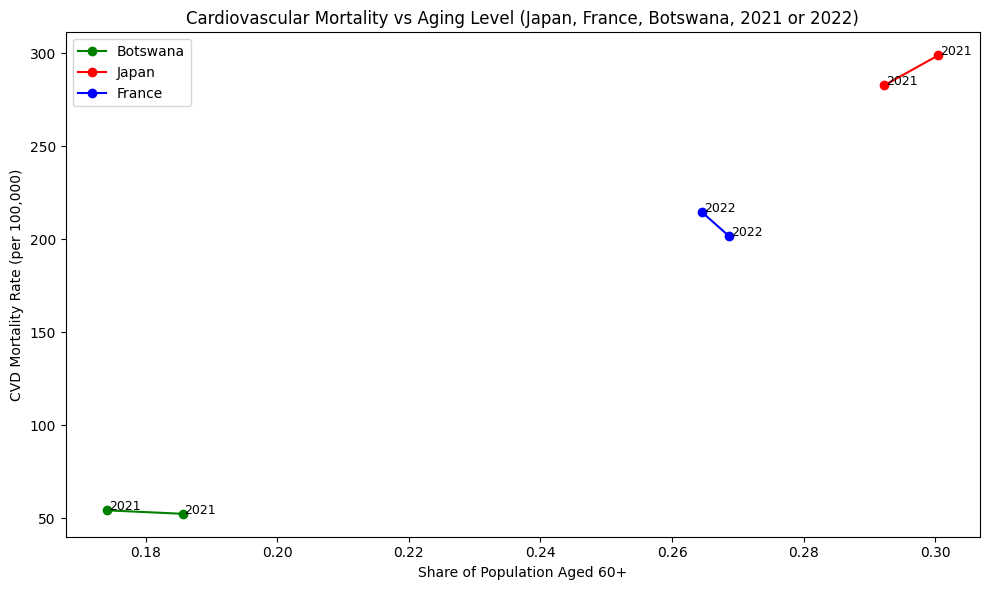

In [92]:
country_list = selected_three["Country"].astype(str).tolist()

df_plot = merged[merged["Country"].isin(country_list)]

plt.figure(figsize=(10,6))

colors = {
    "Japan": "red",
    "France": "blue",
    "Botswana": "green"
}

for cid in country_list:
    df_c = df_plot[df_plot["Country"] == cid].sort_values("Year")
    cname = df_c["name"].iloc[0]

    plt.plot(df_c["ElderlyRatio"], df_c["CVD_mortality_rate"],
             marker="o", label=cname, color=colors.get(cname, None))

    for _, row in df_c.iterrows():
        plt.text(
            row["ElderlyRatio"] + 0.0003,
            row["CVD_mortality_rate"],
            str(int(row["Year"])),
            fontsize=9
        )

plt.xlabel("Share of Population Aged 60+")
plt.ylabel("CVD Mortality Rate (per 100,000)")
plt.title("Cardiovascular Mortality vs Aging Level (Japan, France, Botswana, 2021 or 2022)")
plt.legend()
plt.tight_layout()
plt.show()


Japan, the most aged population in the comparison, consistently shows the highest CVD mortality rates, supporting the expectation that older societies face a greater cardiovascular burden. France, with a moderate elderly share, exhibits mid-range mortality levels, while Botswana, the youngest population among the three, reports the lowest CVD mortality rates.

Despite small year-to-year fluctuations, the overall pattern suggests that differences in demographic age structure are strongly associated with differences in cardiovascular mortality, and this association appears more substantial than short-term variation within each country.

Summary: Using WHO mortality and population datasets, this project examines the relationship between a country’s aging structure and its burden of cardiovascular disease (CVD). Because data availability varies by country and year, the analysis relies on the most recent complete observations from 2021 or 2022, ensuring consistency across the three selected countries: Japan, France, and Botswana. These countries represent high-aging, medium-aging, and low-aging societies, respectively. 

By plotting the share of adults aged 60+ against CVD mortality rates, the visualization highlights a clear pattern: older societies tend to experience higher CVD burdens, even after accounting for differences in total population size. Although healthcare quality and socioeconomic factors also play important roles, the chart suggests that population aging alone remains a strong structural driver of cardiovascular mortality.

Refelction: Even though the dataset is limited, some countries only reported one or two recent years. I still learned a lot from working through the analysis. Cleaning the data, merging different sources, and visualizing cross-country patterns helped me better understand both the strengths and the gaps in real-world public health data. The project also showed me that even with imperfect data, it is still possible to identify meaningful patterns and develop reasonable insights, as long as the limitations are clearly acknowledged.